In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [7]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X=df.iloc[:,1:]

In [9]:
y=df.iloc[:,0]
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [10]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsClassifier


In [52]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
knn=KNeighborsClassifier()



In [23]:
from sklearn.metrics import accuracy_score as ac

y_pred=knn.predict(x_test)
ac(y_test,y_pred)

0.9648809523809524

using pca****# 

In [15]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38727,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


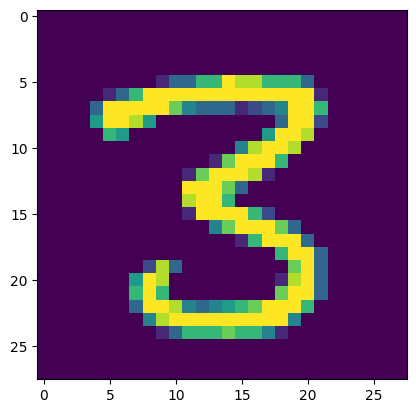

In [16]:
from matplotlib import pyplot as plt


plt.imshow(df.iloc[13051,1:].values.reshape(28,28))
plt.imshow(df.iloc[38727,1:].values.reshape(28,28))

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# -----------------------------
# 1️⃣ Load Data
# -----------------------------
# If using Kaggle MNIST, load like:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

# Features (pixels) and labels
X = df.drop('label', axis=1)
y = df['label']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# -----------------------------
# 2️⃣ Split Data
# -----------------------------
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 3️⃣ Scale Data
# -----------------------------
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# -----------------------------
# 4️⃣ PCA Dimensionality Reduction
# -----------------------------
# Reduce from 784 features → 100 principal components
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

print("PCA reduced shapes:", x_train_pca.shape, x_test_pca.shape)

# -----------------------------
# 5️⃣ KNN Classifier
# -----------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_pca, y_train)

# -----------------------------
# 6️⃣ Evaluate
# -----------------------------
y_pred = knn.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Model Accuracy after PCA: {accuracy*100:.2f}%")


Shape of X: (42000, 784)
Shape of y: (42000,)
PCA reduced shapes: (33600, 100) (8400, 100)
✅ Model Accuracy after PCA: 95.51%


In [23]:
import plotly.express as px
y_train_pca = y_train.astype(str)
fig = px.scatter(x=x_train_pca[:,0],
y=x_train_pca[ :, 1],
color=y_train_trf,
color_discrete_sequence=px.colors.qualitative.G10
)

fig.show( )